In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# listing all the csv files

csv_files = [
    'perfume_office.csv',
    'perfume_pantry.csv',
    'tea_office.csv',
    'vinegar_office.csv',
    'normal_air_pantry.csv',
    'tea_pantry.csv',
    'hot_coffee_office.csv',
    'normal_air_office.csv',
    'vinegar_pantry.csv'
]


# We assume the original files have a header row we need to skip
column_names = [
    'Timestamp', 'Humidity', 'Temperature', 'NO2',
    'Ethanol', 'VOC', 'CO', 'Location', 'Label'
]

In [3]:

# Automatically find the correct input path
for dirname, _, filenames in os.walk('/kaggle/input'):
    if 'perfume_office.csv' in filenames:
        input_dir = dirname
        break

print("Using input directory:", input_dir)
print("Files in dataset folder:", os.listdir(input_dir))

Using input directory: /kaggle/input/ai-nose-dataset-250
Files in dataset folder: ['perfume_office.csv', 'perfume_pantry.csv', 'tea_office.csv', 'vinegar_office.csv', 'normal_air_pantry.csv', 'tea_pantry.csv', 'hot_coffee_office.csv', 'normal_air_office.csv', 'vinegar_pantry.csv']


In [4]:
 
# list to hold the individial Dataframes
dataframes = []

# Load and Combine Data 
print("--- Loading and Combining Data ---")


for file in csv_files:
    file_path = os.path.join(input_dir, file)
    print(f"Loading {file_path}...")
    try:
        # Read the CSV, skipping the header row and assigning our defined column names
        df = pd.read_csv(file_path, skiprows=1, names=column_names)
        dataframes.append(df)
        print(f"Loaded {file} with {len(df)} rows.")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure your dataset is added correctly.")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Concatenate all dataframes into a single one
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print("\nAll files combined successfully!")
    print(f"Total number of samples: {len(combined_df)}")
    print("\nInfo on combined data:")
    combined_df.info() # Display data types and non-null counts
    print("\nFirst 5 rows of combined data:")
    print(combined_df.head())
else:
    print("\nNo dataframes were loaded. Exiting.")
    # You would typically stop execution here if no data loaded
    # exit() # Or sys.exit() if you import sys



--- Loading and Combining Data ---
Loading /kaggle/input/ai-nose-dataset-250/perfume_office.csv...
Loaded perfume_office.csv with 250 rows.
Loading /kaggle/input/ai-nose-dataset-250/perfume_pantry.csv...
Loaded perfume_pantry.csv with 242 rows.
Loading /kaggle/input/ai-nose-dataset-250/tea_office.csv...
Loaded tea_office.csv with 249 rows.
Loading /kaggle/input/ai-nose-dataset-250/vinegar_office.csv...
Loaded vinegar_office.csv with 249 rows.
Loading /kaggle/input/ai-nose-dataset-250/normal_air_pantry.csv...
Loaded normal_air_pantry.csv with 220 rows.
Loading /kaggle/input/ai-nose-dataset-250/tea_pantry.csv...
Loaded tea_pantry.csv with 221 rows.
Loading /kaggle/input/ai-nose-dataset-250/hot_coffee_office.csv...
Loaded hot_coffee_office.csv with 111 rows.
Loading /kaggle/input/ai-nose-dataset-250/normal_air_office.csv...
Loaded normal_air_office.csv with 148 rows.
Loading /kaggle/input/ai-nose-dataset-250/vinegar_pantry.csv...
Loaded vinegar_pantry.csv with 249 rows.

All files combine

In [5]:
# Select What We Need (Features and Label) 
# We drop Timestamp and Location for simplicity 
# Features (X) are the sensor readings
X = combined_df[['Humidity', 'Temperature', 'NO2', 'Ethanol', 'VOC', 'CO']]

# Label (y) is the target variable
y = combined_df['Label']

print("\n--- Features and Labels Selected ---")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")
print("\nFirst 5 rows of Features (X):")
print(X.head())
print("\nFirst 5 rows of Labels (y):")
print(y.head())




--- Features and Labels Selected ---
Shape of features (X): (1939, 6)
Shape of labels (y): (1939,)

First 5 rows of Features (X):
   Humidity  Temperature  NO2  Ethanol  VOC   CO
0      52.7         25.2  440      705  459  103
1      52.6         25.2  447      723  466  137
2      52.9         25.2  466      757  503  314
3      54.4         25.2  477      766  509  211
4      55.4         25.2  471      761  503  164

First 5 rows of Labels (y):
0    perfume
1    perfume
2    perfume
3    perfume
4    perfume
Name: Label, dtype: object


In [6]:
# Prepare the Label (Label Encoding) 
# We need to convert the text labels into numbers.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) # This learns the mapping and transforms the labels

print("\n--- Label Encoding Complete ---")
print("Unique original labels:", label_encoder.classes_)
print("Encoded labels (first 5):", y_encoded[:5])



--- Label Encoding Complete ---
Unique original labels: ['air' 'coffee' 'perfume' 'tea' 'vinegar ']
Encoded labels (first 5): [2 2 2 2 2]


In [7]:
# Prepare the Features (Scaling) ---
# Scale the sensor readings so they are in a similar range.
scaler = StandardScaler() # StandardScaler makes the mean 0 and std deviation 1
X_scaled = scaler.fit_transform(X) # This learns the scaling parameters and applies the scaling

print("\n--- Feature Scaling Complete ---")
print("Scaled Features (first 5 rows):")
print(X_scaled[:5])



--- Feature Scaling Complete ---
Scaled Features (first 5 rows):
[[-0.64224301 -1.10846904  0.43079302  0.78159796  0.47789473 -0.46598971]
 [-0.64918504 -1.10846904  0.49264214  0.91050207  0.53281451  0.34979545]
 [-0.62835896 -1.10846904  0.66051831  1.1539876   0.82310476  4.59667701]
 [-0.52422857 -1.10846904  0.75770978  1.21843966  0.87017886  2.12532785]
 [-0.45480831 -1.10846904  0.70469625  1.18263296  0.82310476  0.99762484]]


In [8]:
# Split the Data 
# Split the data into training and testing sets.
# We'll use 80% for training and 20% for testing.
# random_state ensures the split is the same every time you run the code.
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded # stratify ensures train/test have proportional representation of labels
)

print("\n--- Data Splitting Complete ---")
print(f"Training data shape (X_train): {X_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")
print(f"Training labels shape (y_train_encoded): {y_train_encoded.shape}")
print(f"Testing labels shape (y_test_encoded): {y_test_encoded.shape}")

# We now have our data ready for training:
# X_train: Scaled sensor readings for training
# y_train_encoded: Numerical labels for training
# X_test: Scaled sensor readings for testing
# y_test_encoded: Numerical labels for testing



--- Data Splitting Complete ---
Training data shape (X_train): (1551, 6)
Testing data shape (X_test): (388, 6)
Training labels shape (y_train_encoded): (1551,)
Testing labels shape (y_test_encoded): (388,)


In [9]:
# # Checking the best value of k
# # Range of k values to try
# k_range = range(1, 21)  # Trying k = 1 to 20
# cv_scores = []          # List to store cross-validation scores

# # Loop through each value of k
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # Perform 5-fold cross-validation
#     scores = cross_val_score(knn, X_train, y_train_encoded, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())  # Average accuracy for each k

# # Find the best k
# best_k = k_range[cv_scores.index(max(cv_scores))]
# print(f"Best k value is: {best_k}")
# print(f"Cross-validated accuracy: {max(cv_scores):.4f}")

# # Plotting k vs accuracy
# plt.plot(k_range, cv_scores, marker='o')
# plt.xlabel('k value')
# plt.ylabel('Cross-Validated Accuracy')
# plt.title('KNN: Choosing the best k')
# plt.grid(True)
# plt.show()


In [10]:
# KNN Model

print("--- Training K-Nearest Neighbors (KNN) Model ---")

# Create a KNN classifier instance
# n_neighbors is the 'k' value. Starting with 5.
knn_model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training data
knn_model.fit(X_train, y_train_encoded)

print("KNN Model training complete.")

#  Evaluate the KNN Model 
print("\n--- Evaluating KNN Model ---")

# Predict on the test data
y_pred_encoded_knn = knn_model.predict(X_test)

# Calculate Accuracy
accuracy_knn = accuracy_score(y_test_encoded, y_pred_encoded_knn)
print(f"KNN Model Accuracy on the test set: {accuracy_knn:.4f}")





--- Training K-Nearest Neighbors (KNN) Model ---
KNN Model training complete.

--- Evaluating KNN Model ---
KNN Model Accuracy on the test set: 0.9845


In [11]:
# Print Classification Report 
# This gives more detailed metrics (Precision, Recall, F1-score) for each class
# To get meaningful class names in the report, you would need the original label_encoder
# and its .classes_ attribute from the data prep step.
try:
    print("\nKNN Classification Report:")
    print(classification_report(y_test_encoded, y_pred_encoded_knn, target_names=label_encoder.classes_))
except NameError:
    print("\nCannot print classification report with class names: label_encoder not available.")
    print(classification_report(y_test_encoded, y_pred_encoded_knn))

# If label_encoder is not available, you can run the classification report without target_names
print("\nKNN Classification Report (using encoded labels):")
print(classification_report(y_test_encoded, y_pred_encoded_knn))


print("\n--- KNN Model Evaluation Complete ---")
# The accuracy score (and classification report) on the test set
# tells you how well the model is likely to perform on new, unseen data.



KNN Classification Report:
              precision    recall  f1-score   support

         air       1.00      1.00      1.00        74
      coffee       1.00      1.00      1.00        22
     perfume       1.00      0.97      0.98        98
         tea       0.96      0.99      0.97        94
    vinegar        0.98      0.98      0.98       100

    accuracy                           0.98       388
   macro avg       0.99      0.99      0.99       388
weighted avg       0.98      0.98      0.98       388


KNN Classification Report (using encoded labels):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        22
           2       1.00      0.97      0.98        98
           3       0.96      0.99      0.97        94
           4       0.98      0.98      0.98       100

    accuracy                           0.98       388
   macro avg       0.99      0.99      0.99       38

In [12]:
# Decision Tree Model 

# Make sure you have run the previous data preparation code first
# This assumes X_train, X_test, y_train_encoded, y_test_encoded are available

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print("\n--- Training Decision Tree Model ---")

# Create a Decision Tree classifier instance
# max_depth limits how deep the tree can grow. Helps prevent overfitting.
# Starting with max_depth=5 
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42) # random_state for reproducibility

# Train the model using the training data
dt_model.fit(X_train, y_train_encoded)

print("Decision Tree Model training complete.")

# Evaluate the Decision Tree Model
print("\n--- Evaluating Decision Tree Model ---")

# Predict on the test data
y_pred_encoded_dt = dt_model.predict(X_test)

# Calculate Accuracy
accuracy_dt = accuracy_score(y_test_encoded, y_pred_encoded_dt)
print(f"Decision Tree Model Accuracy on the test set: {accuracy_dt:.4f}")

# Optional: Print Classification Report 
# Same note as with KNN regarding label_encoder
# try:
#     print("\nDecision Tree Classification Report:")
#     print(classification_report(y_test_encoded, y_pred_encoded_dt, target_names=label_encoder.classes_))
# except NameError:
#     print("\nCannot print classification report with class names: label_encoder not available.")
#     print(classification_report(y_test_encoded, y_pred_encoded_dt))

print("\nDecision Tree Classification Report (using encoded labels):")
print(classification_report(y_test_encoded, y_pred_encoded_dt))


print("\n--- Decision Tree Model Evaluation Complete ---")



--- Training Decision Tree Model ---
Decision Tree Model training complete.

--- Evaluating Decision Tree Model ---
Decision Tree Model Accuracy on the test set: 0.9665

Decision Tree Classification Report (using encoded labels):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        22
           2       0.98      0.94      0.96        98
           3       0.94      0.96      0.95        94
           4       0.95      0.97      0.96       100

    accuracy                           0.97       388
   macro avg       0.97      0.97      0.97       388
weighted avg       0.97      0.97      0.97       388


--- Decision Tree Model Evaluation Complete ---



--- Detailed Evaluation on Test Set (KNN Model) ---

KNN Classification Report on Test Set:
              precision    recall  f1-score   support

         air       1.00      1.00      1.00        74
      coffee       1.00      1.00      1.00        22
     perfume       1.00      0.97      0.98        98
         tea       0.96      0.99      0.97        94
    vinegar        0.98      0.98      0.98       100

    accuracy                           0.98       388
   macro avg       0.99      0.99      0.99       388
weighted avg       0.98      0.98      0.98       388


Generating Confusion Matrix...


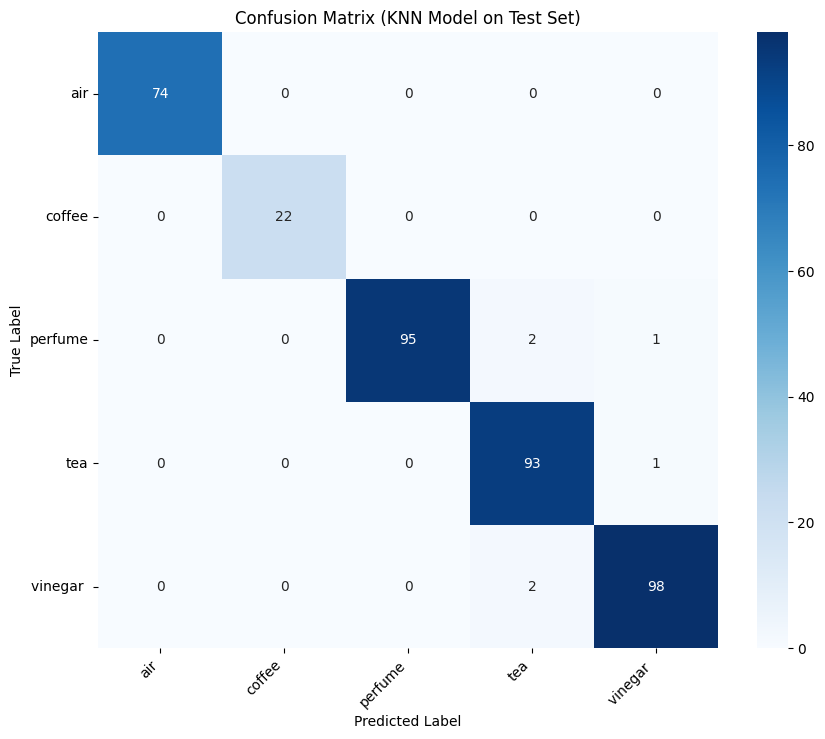


--- Detailed Evaluation Complete ---


In [13]:
# Classification Report and Confusion Matrix (KNN) 
# Assumes knn_model (trained with n_neighbors=5), X_test, y_test_encoded

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\n--- Detailed Evaluation on Test Set (KNN Model) ---")

# Make predictions on the test set (if not already done)
# y_pred_encoded_knn = knn_model.predict(X_test) # Uncomment if needed

# --- Classification Report ---
print("\nKNN Classification Report on Test Set:")
try:
    # Use target_names from the original label_encoder if available
    print(classification_report(y_test_encoded, y_pred_encoded_knn, target_names=label_encoder.classes_))
except NameError:
    print("label_encoder not available. Printing report with encoded labels:")
    print(classification_report(y_test_encoded, y_pred_encoded_knn))

# --- Confusion Matrix ---
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test_encoded, y_pred_encoded_knn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # annot=True shows numbers, fmt='d' formats as integers
plt.xlabel('Predicted Label (Encoded)')
plt.ylabel('True Label (Encoded)')
plt.title('Confusion Matrix (KNN Model on Test Set)')

# If you have label_encoder, you can try adding tick labels
try:
    tick_labels = label_encoder.classes_
    plt.xticks(ticks=[i + 0.5 for i in range(len(tick_labels))], labels=tick_labels, rotation=45, ha='right')
    plt.yticks(ticks=[i + 0.5 for i in range(len(tick_labels))], labels=tick_labels, rotation=0)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (KNN Model on Test Set)')
except NameError:
     pass # Keep default encoded labels if label_encoder not available


plt.show()

print("\n--- Detailed Evaluation Complete ---")